### Advanced SQL Questions and Answers

I have saved the .sql files requred to build the database in the same folder


### Using Joins
#### Question 1
- Write and execute a SQL qury to list the school names, community names and average attendance for communites with a hardhip of 98


In [ ]:

SELECT CPS.NAME_OF_SCHOOL, CPS.COMMUNITY_AREA_NAME, CPS.AVERAGE_STUDENT_ATTENDANCE
FROM chicago_public_schools CPS LEFT OUTER JOIN chicago_socioeconomic_data CSD
ON CPS.COMMUNITY_AREA_NUMBER = CSD.COMMUNITY_AREA_NUMBER
WHERE HARDSHIP_INDEX = 98;


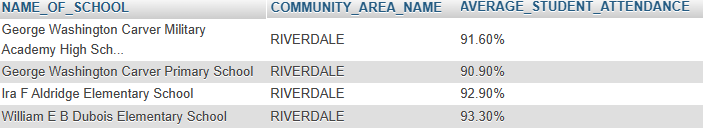

#### Question 2
- Write and execute a SQL qury to list all crimes that took place at a school. Include case number, crime type and community name


In [ ]:
SELECT CASE_NUMBER, PRIMARY_TYPE, COMMUNITY_AREA_NAME
FROM chicago_crime CC LEFT OUTER JOIN chicago_socioeconomic_data CSD
ON CC.COMMUNITY_AREA_NUMBER = CSD.COMMUNITY_AREA_NUMBER
WHERE LOCATION_DESCRIPTION LIKE ('%SCHOOL%');

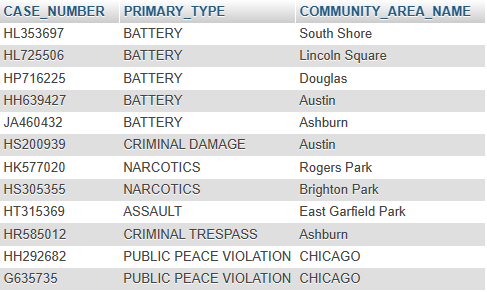

### Creating a View
#### Question 1
- Write and execute a SQL statement to create a view showing the columns listed in the following table, with new column names as shown in the second column
<table>
<thead>
<tr>
<th>Column name in CHICAGO_PUBLIC_SCHOOLS</th>
<th>Column name in view</th>
</tr>
</thead>
<tbody><tr>
<td>NAME_OF_SCHOOL</td>
<td>School_Name</td>
</tr>
<tr>
<td>Safety_Icon</td>
<td>Safety_Rating</td>
</tr>
<tr>
<td>Family_Involvement_Icon</td>
<td>Family_Rating</td>
</tr>
<tr>
<td>Environment_Icon</td>
<td>Environment_Rating</td>
</tr>
<tr>
<td>Instruction_Icon</td>
<td>Instruction_Rating</td>
</tr>
<tr>
<td>Leaders_Icon</td>
<td>Leaders_Rating</td>
</tr>
<tr>
<td>Teachers_Icon</td>
<td>Teachers_Rating</td>
</tr>
</tbody></table>

- Write and execute a SQL statement that returns all of the columns form the view
- Write and execute a SQL statement that returns just the school name and leaders rating from the view



In [ ]:
CREATE OR REPLACE VIEW RATINGS AS
SELECT NAME_OF_SCHOOL AS School_Name, SAFETY_ICON AS Safety_Rating, Family_Involvement_Icon as Family_Rating, Environment_Icon as Environment_Rating, Instruction_Icon as Instruction_Rating, Leaders_icon as Leaders_Rating, Teachers_Icon as Teachers_Rating
FROM chicago_public_schools;

SELECT * FROM RATINGS;

SELECT School_Name, Leaders_Rating
FROM RATINGS;

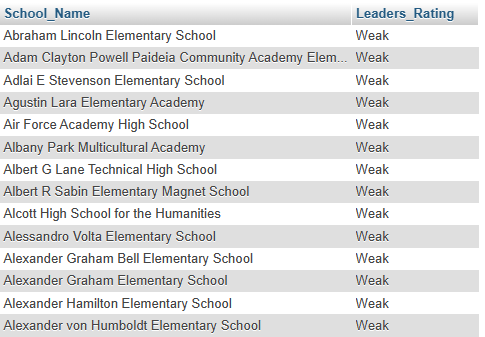

### Creating a Stored Procedure
#### Question 1
- Write the structure of a query to create or replace a stored procedure called UPDATE_LEADERS_SCORE that takes a in_School_ID parameter as an integer and a in_LEADER_SCORE parameter as an integer

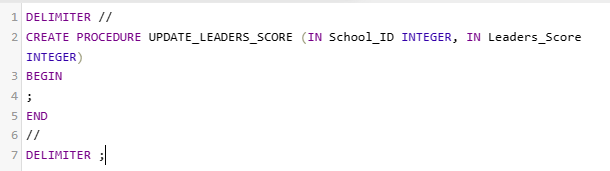

#### Question 2
- Inside your stored procedure, write a SQL statement to update the Leaders_Score field in the chicago_Public_Schools table for the school identified by in_School_ID to the value in the in_Leader_Score parameter

In [ ]:
DELIMITER //
CREATE PROCEDURE UPDATE_LEADERS_SCORE (IN in_School_ID INTEGER, IN in_Leaders_Score INTEGER)
BEGIN
UPDATE chicago_public_schools SET Leaders_Score = in_Leaders_Score
WHERE School_ID = in_School_ID
END
//
DELIMITER ;

#### Question 3
- Inside your stored procedure, write a SQL IF statement to update the Leaders_Icon field in the CHICAGO_PUBLIC_SCHOOLS table for the schol identified by in_School_ID using the following information

<table>
<thead>
<tr>
<th>Score lower limit</th>
<th>Score upper limit</th>
<th>Icon</th>
</tr>
</thead>
<tbody><tr>
<td>80</td>
<td>99</td>
<td>Very strong</td>
</tr>
<tr>
<td>60</td>
<td>79</td>
<td>Strong</td>
</tr>
<tr>
<td>40</td>
<td>59</td>
<td>Average</td>
</tr>
<tr>
<td>20</td>
<td>39</td>
<td>Weak</td>
</tr>
<tr>
<td>0</td>
<td>19</td>
<td>Very weak</td>
</tr>
</tbody></table>


DELIMITER //
CREATE PROCEDURE UPDATE_LEADERS_SCORE (IN in_School_ID INTEGER, IN in_Leaders_Score INTEGER)
BEGIN
UPDATE chicago_public_schools SET Leaders_Score = in_Leaders_Score
WHERE School_ID = in_School_ID;
IF in_Leaders_Score > 0 AND in_Leaders_Score < 20 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Very Weak')
	WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 40 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Weak')
	WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 60 THEN
	UPDATE chicago_public_schools Set Leaders_Icon = ('Average')
	WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 80 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Strong')
	WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 100 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Very Strong')
	WHERE School_ID = in_School_ID;
END IF;
END
//
DELIMITER ;



# I had to update the limit on the Leaders_Icon column as it was limited to 4 characters. I updated it to 11 so that it would be able to hold all the data we can input



#### Question 4
- Run your code to create the stored procedure

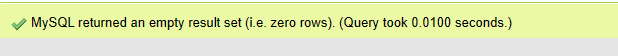

- Write a query to call the stored procedure, passing a valid school ID and a leader score of 50, to check that the procedure works as expected

 I had to update the limit on the Leaders_Icon column as it was limited to 4 characters. I updated it to 11 so that it would be able to hold all the data we can input

CALL UPDATE_LEADERS_SCORE(610038,50);

SELECT School_ID, NAME_OF_SCHOOL, Leaders_Score, Leaders_Icon from chicago_public_schools
where School_ID = 610038;

### Using Transactions
#### Question 1
Update your stored procedure definition. Add a generic ELSE clause to the IF statement that rolls back the current work if the score did not fit any of the preceding categories

DELIMITER //
CREATE PROCEDURE UPDATE_LEADERS_SCORE (IN in_School_ID INTEGER, IN in_Leaders_Score INTEGER)
BEGIN
UPDATE chicago_public_schools SET Leaders_Score = in_Leaders_Score
WHERE School_ID = in_School_ID;
IF in_Leaders_Score > 0 AND in_Leaders_Score < 20 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Very Weak')
	WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 40 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Weak')
	WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 60 THEN
	UPDATE chicago_public_schools Set Leaders_Icon = ('Average')
	WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 80 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Strong')
	WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 100 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Very Strong')
	WHERE School_ID = in_School_ID;
ELSE ROLLBACK;
IF in_Leaders_Score > 0 AND in_Leaders_Score <100 THEN
	UPDATE chicago_public_schools SET Leaders_Score = in_Leaders_Score
	WHERE School_ID = in_School_ID;
ELSE ROLLBACK;
END IF;
END
//
DELIMITER ;

#### Question 2
- Update your stored procedure definition again. Add a statement to commit the current unit of work at the end of the procedure


DELIMITER //
CREATE PROCEDURE UPDATE_LEADERS_SCORE (IN in_School_ID INTEGER, IN in_Leaders_Score INTEGER)
BEGIN

IF in_Leaders_Score > 0 AND in_Leaders_Score < 20 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Very Weak')
    WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 40 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Weak')
    WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 60 THEN
	UPDATE chicago_public_schools Set Leaders_Icon = ('Average')
    WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 80 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Strong')
    WHERE School_ID = in_School_ID;
ELSEIF in_Leaders_Score < 100 THEN
	UPDATE chicago_public_schools SET Leaders_Icon = ('Very Strong')
    WHERE School_ID = in_School_ID;
ELSE ROLLBACK;
END IF;
IF in_Leaders_Score > 0 AND in_Leaders_Score <100 THEN
	UPDATE chicago_public_schools SET Leaders_Score = in_Leaders_Score
	WHERE School_ID = in_School_ID;
ELSE ROLLBACK;
END IF;
COMMIT;
END
//
DELIMITER ;

- Run your code to replace the store procedure
- Write and run one query to check that the update stored procedure works as expected when you use a valid score of 38
- Write and run another query to check that the update stored procedure works as expected when you use an invalid score of 101

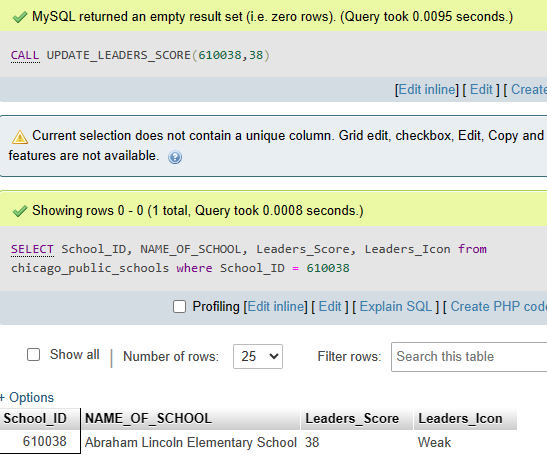

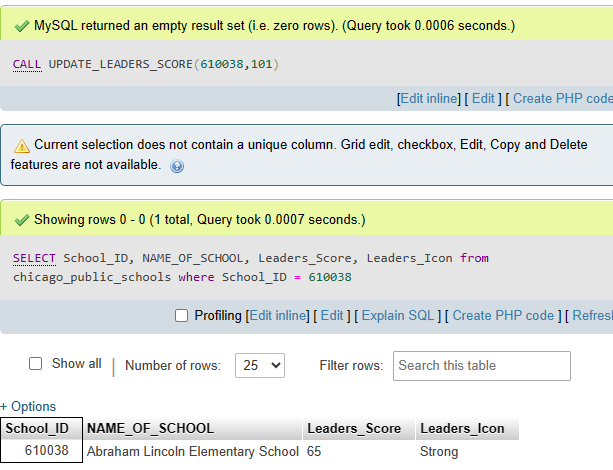

